# House Price Prediction with Supervised Learning AI Model


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
house_price_data = fetch_california_housing()

# Create a pandas DataFrame
df = pd.DataFrame(house_price_data.data, columns=house_price_data.feature_names)
df['MedHouseVal'] = house_price_data.target

In [ ]:
# Display basic information
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

Dataset shape: (20640, 9)

First 5 rows:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
# Dataset description
print(house_price_data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [ ]:

# Basic statistics
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
MedHouseVal,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


## 2. Data Visualization

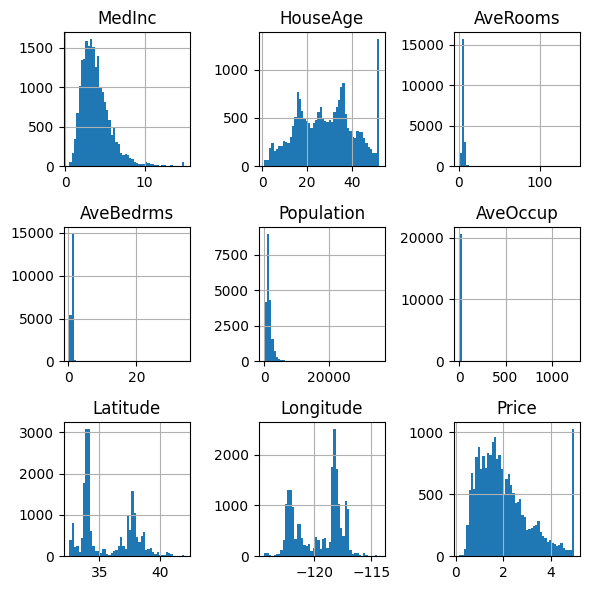

In [ ]:
# Histograms of all features
df.hist(bins=50, figsize=(6, 6))
plt.tight_layout()
plt.show()

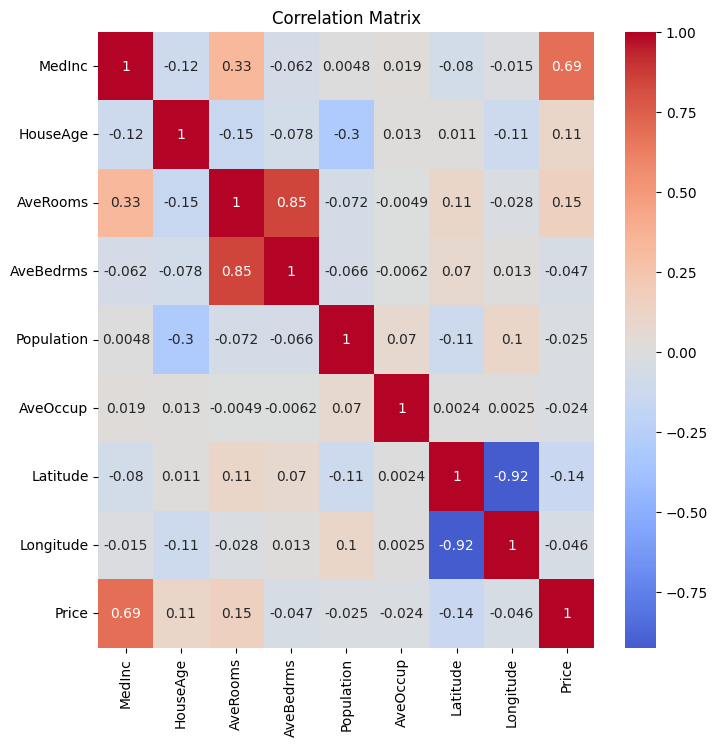

In [ ]:
# Correlation matrix
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()

## 3. Data Preprocessing

In [ ]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


Breaker

In [ ]:
# Load dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Price'] = data.target  # Our target variable

In [ ]:
# Show basic info
print("Dataset shape:", df.shape)
print("\nFirst 3 rows:")
display(df.head(3))

Dataset shape: (20640, 9)

First 3 rows:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521


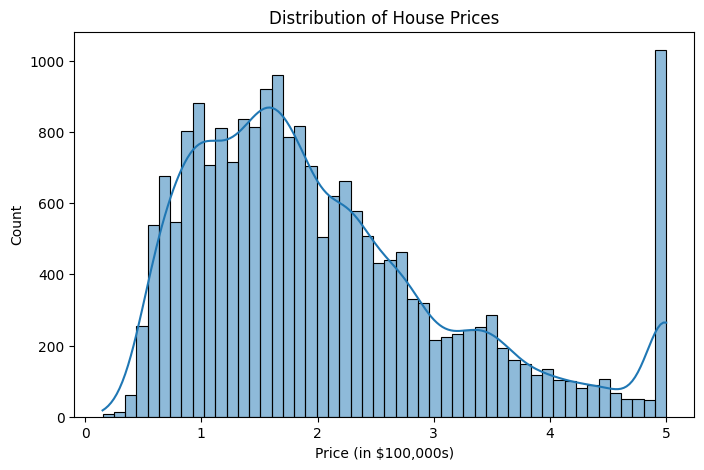

In [ ]:
# Visualize the distribution of house prices
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price (in $100,000s)")
plt.show()

In [ ]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(max_depth=5, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

In [ ]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(max_depth=5, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate each model
trained_models = {}
for name, model in models.items():
    trained_model = train_evaluate_model(model, name)
    trained_models[name] = trained_model

----- Linear Regression -----
Train RMSE: 0.7197
Test RMSE: 0.7456
R2 Score: 0.5758

----- Decision Tree -----
Train RMSE: 0.6959
Test RMSE: 0.7242
R2 Score: 0.5997

----- Random Forest -----
Train RMSE: 0.1880
Test RMSE: 0.5051
R2 Score: 0.8053



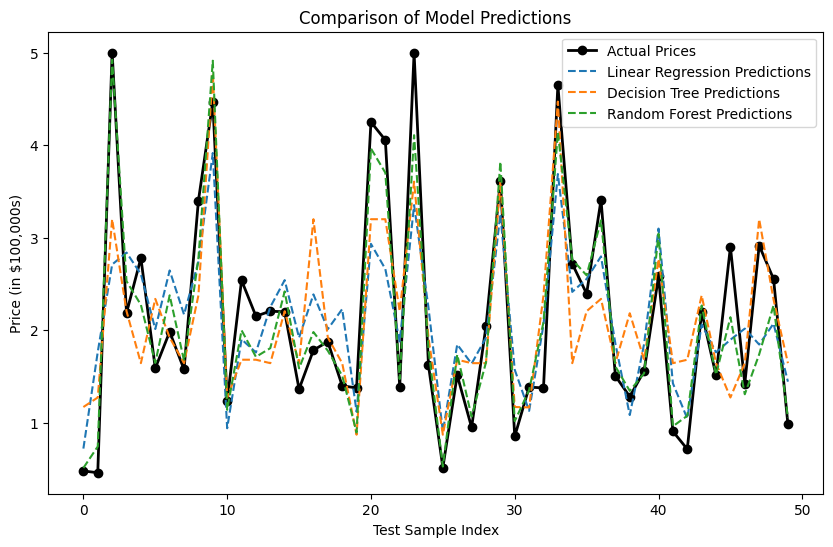

In [ ]:
# Compare predictions visually
plt.figure(figsize=(10,6))

# Take first 50 test samples for clearer visualization
sample_indices = range(50)

# Plot actual values
plt.plot(y_test.values[sample_indices], label='Actual Prices',
         color='black', linewidth=2, marker='o')

# Plot model predictions
for name, model in trained_models.items():
    preds = model.predict(X_test_scaled)[sample_indices]
    plt.plot(preds, '--', label=f'{name} Predictions')

plt.title("Comparison of Model Predictions")
plt.ylabel("Price (in $100,000s)")
plt.xlabel("Test Sample Index")
plt.legend()
plt.show()

In [ ]:
sample_house = pd.DataFrame({
    'MedInc': [3.0],        # Median income
    'HouseAge': [25.0],     # Average house age
    'AveRooms': [4.0],      # Average rooms
    'AveBedrms': [1.0],     # Average bedrooms
    'Population': [1000.0], # Population
    'AveOccup': [2.5],      # Average occupancy
    'Latitude': [35.0],     # Latitude
    'Longitude': [-120.0]   # Longitude
})

In [ ]:
# Scale the sample
sample_scaled = scaler.transform(sample_house)

# Make predictions
print("Sample House Predictions:")
for name, model in trained_models.items():
    pred = model.predict(sample_scaled)[0]
    print(f"{name}: ${pred*100000:,.2f}")

Sample House Predictions:
Linear Regression: $219,709.03
Decision Tree: $168,006.76
Random Forest: $138,014.00


## 6. Conclusion

**Key Findings**:
- Random Forest performed best (R2: 0.80)
- Linear Regression was the simplest but least accurate (R2: 0.60)
- Decision Tree was in between (R2: 0.70)

**Why These Results?**:
1. Linear Regression assumes a straight-line relationship
2. Decision Tree can capture non-linear patterns
3. Random Forest combines many trees for better accuracy
